# Tutorial 1 - Playing around with the perceptron learning algorithm 

In [86]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline
# Plotting with style! 
import seaborn as sb 

# Size the plot appropriately for online display
pl.rcParams['figure.figsize'] = (12.0, 10.0)

The linear perceptron algorithm can be used to classify data points according to pre-selected features they have. The idea is to find a curve (or hyperplane) that separates points with different features. Once we have the curve, we can use it to decide if future points are of feature A or B based on where they are with respect to the curve (above or below it).   

Let's fix the random number generator first, in case we need results that are replicable.

In [87]:
nr.seed(3244)

Below, we generate a collection of points and then paint them according to a line. If the points are above the line, they are red, if they are below, blue. 

('f(x) = ', 0.16306752300749394, 'x +', 0.4569343115786998)


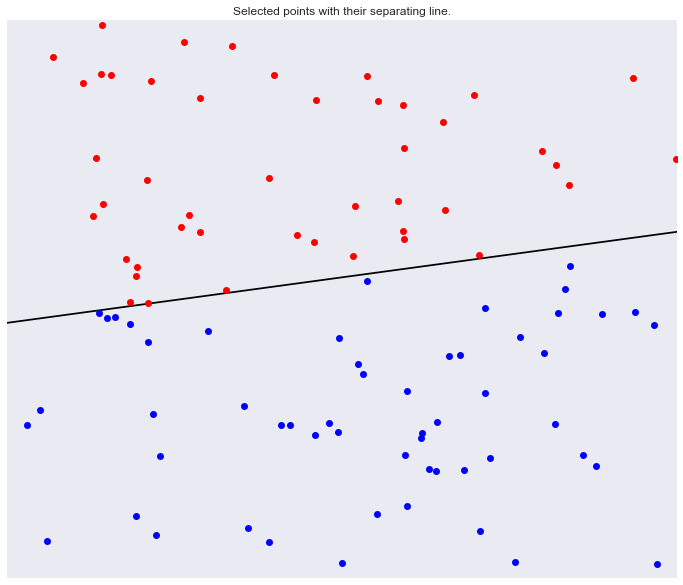

In [88]:
## Generate some points
# numpy.random.rand(d0, d1, ..., dn) - Random values in a given shape.
# Create an array of the given shape and propagate it with random samples from a uniform distribution over [0, 1).                                                                                                         N = 100
N = 100
xn = nr.rand(N,2)

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]
# Return evenly spaced numbers over a specified interval.
x = np.linspace(0,1)

# Create the unknown target function - pick a random line
a = nr.rand()
b = nr.rand()
f = lambda x : a*x + b
print ("f(x) = ", a, "x +", b) 

fig = pl.figure()
# draw the line in blac'k'
pl.plot(x,f(x),'k', label="Separator")

# Linearly separate the points by the line
yn = np.zeros([N,1])
for i in range(N):
    if(f(xn[i,0])<=xn[i,1]):
        # Point is above line, plot 'r'ed 'o's
        yn[i] = 1
        pl.plot(xn[i,0],xn[i,1],'ro', label="Above")
    else:
        # Point is below line, plot 'b'lue 'o's
        yn[i] = -1
        pl.plot(xn[i,0],xn[i,1],'bo', label="Below")

pl.title('Selected points with their separating line.')

# Turn off axes labels
figa = pl.gca();
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

The curve naturally separates the space into two regions, one of red points and one of blue points. Thus, if we are given a new point, we can assign it a color based on where it is with respect to the curve.

What is not so simple is to find the curve given the points. However, if the points are linearly separable, i.e. if a line exists that does the job, then we can just move a line around until we get it to the correct position. This is what the perceptron learning algorithm does.

**Task 1:** Below is a skeleton of a working (but corrupted) PLA algorithm.  It does the iteration but does not do the weight update.  Modify the algorithm so that it correctly updates the weight.

In [89]:
def pla(xn,yn,maxIter=1000,w=np.zeros(3)):
    '''
        A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {-1,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 
        
        Input: 
            xn : Data points, an Nx2 vector. 
            yn : Classification of the previous data points, an Nx1 vector. 
            maxIter : Maximum number of iterations (optional).
            w  : Initial vector of parameters (optional).
            
        Output: 
            w : Parameters of the best line, y = ax+b, that linearly separates the data. 
        
        Note:
            Convergence will be slower than expected, since this implementation picks points
            to update without a specific plan (randomly). This is enough for a demonstration, not 
            so good for actual work. 
    '''
    
    N = xn.shape[0]
    
    # Separating curve
    g = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for _ in range(maxIter):
        i = nr.randint(N)
        if(yn[i] != g(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
## Begin - Insert your code here
           w += yn[i] * np.append(1 , xn[i,:])
## End - Insert your code here
    return w

**Task 2:** Identify what other difference this implemented version of PLA has from the version introduced in lecture.

You can write your answer in Markdown in the following cell provided.

Firstly, 

Now that we have an implementation, here's a stab at our problem. Let's see how close it gets.

('f(x) = ', 0.16306752300749394, 'x +', 0.4569343115786998)
('  g(x)[', 1, '] = ', 0.33829506283631527, 'x +', 0.48589990848760573)
('  g(x)[', 2, '] = ', 0.33829506283631527, 'x +', 0.48589990848760573)
('  g(x)[', 3, '] = ', 0.33829506283631527, 'x +', 0.48589990848760573)
('  g(x)[', 4, '] = ', 0.33829506283631527, 'x +', 0.48589990848760573)
('  g(x)[', 5, '] = ', 0.33829506283631527, 'x +', 0.48589990848760573)


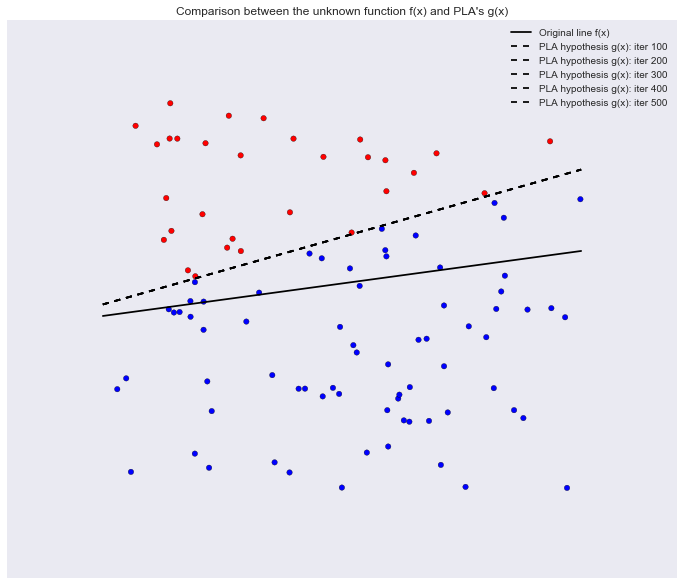

In [90]:
# Set up the plot
pl.figure();
figa = pl.gca()

print ("f(x) = ", a, "x +", b)
pl.plot(x,f(x),'k',label='Original line f(x)')

# run PLA 100's of times
# maxIter = 10
# for hund_iter in range(maxIter):
maxIter = 5
w = pla(xn,yn, hund_iter * 100)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2]
anew = -w[1]/w[2]

g = lambda x: anew * x + bnew

for hund_iter in range(1,maxIter + 1):
    print ("  g(x)[", hund_iter, "] = ", anew, "x +", bnew)
    l = pl.plot(x,g(x),'b--',label='PLA hypothesis g(x): iter ' + str(hund_iter) + '00')
    pl.setp(l,color=str((maxIter-hund_iter)/maxIter))
    
gn = np.sign(g(xn[:,0])-xn[:,1])

# Computing the colors for the points -- a vector of 'blue's and 'red's from yn's = {-1,+1}
color = lambda x: 'blue' if x == 1 else 'red'
colors = [color(item) for item in gn]

pl.scatter(xn[:,0],xn[:,1],c=colors, s=30)
pl.legend()

pl.title('Comparison between the unknown function f(x) and PLA\'s g(x)')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)


Not bad, right? The algorithm should have managed to converge to a good approximation of the separating line. If it didn't, try running the last piece of code again. Remember that this implementation updates randomly picked points, so in some cases convergence will be worse.

Also, note that the line that separates the points is not unique, given the dataset we have available. To think about: would it be so if we had all of the possible information? 

In any case, it can be proven that this process works every time, given a sufficient number of steps. This assumes that the data is linearly separable, a fact that is quite powerful on its own. 

# What if the dataset is not linearly separable?

If the data is not separable by a line, then, in most cases, this process will not work perfectly. Some points will be classified correctly and some will not. We will just show you an example where the classification fails when the points are not separable by a line. You can try with other curves and see what happens. 

Remember that, in our case, given a point $x=(x_1,x_2)$, classification is done according to $\text{sign}(f(x_1)-x_2)$, which can either be -1 or 1.  We'll use a sample function similar to what will be used in lecture, a $sin(x)$ function.

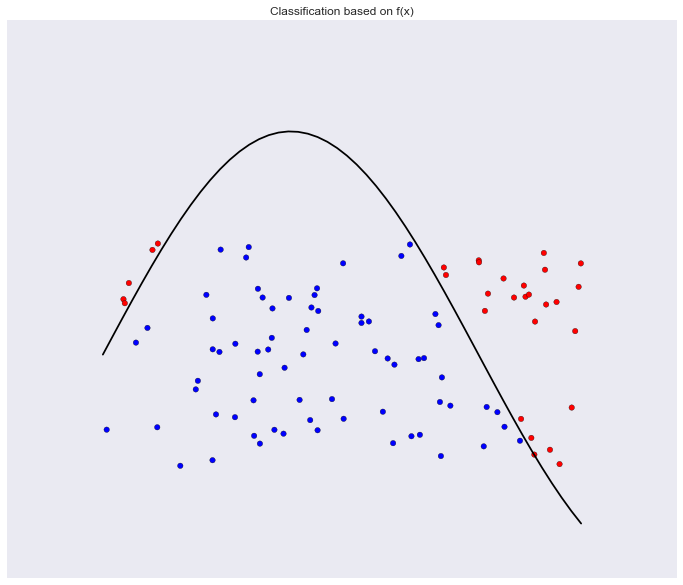

In [39]:
# Change this function to select points with respect to a different curve.
f = lambda x: np.sin(x*4)+.5

x = np.linspace(0,1)

# Generate some data points to play with.
N = 100
xn = nr.rand(N,2)

fig = pl.figure()
figa = pl.gca()

# Plot the unknown function f(x) in blac'k'
pl.plot(x,f(x),'k')

# Classify based on f(x)
yn = np.sign(f(xn[:,0])-xn[:,1])

# Computing the colors for the points -- a vector of 'blue's and 'red's from yn's = {-1,+1}
color = lambda x: 'blue' if x == 1 else 'red'
colors = [color(item) for item in yn]

pl.scatter(xn[:,0],xn[:,1],c=colors,s=30);
pl.title('Classification based on f(x)')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)


In this example, we can see that $sin(x)$ colours some points as red and others as blue. Let us try to find a linear separator now.

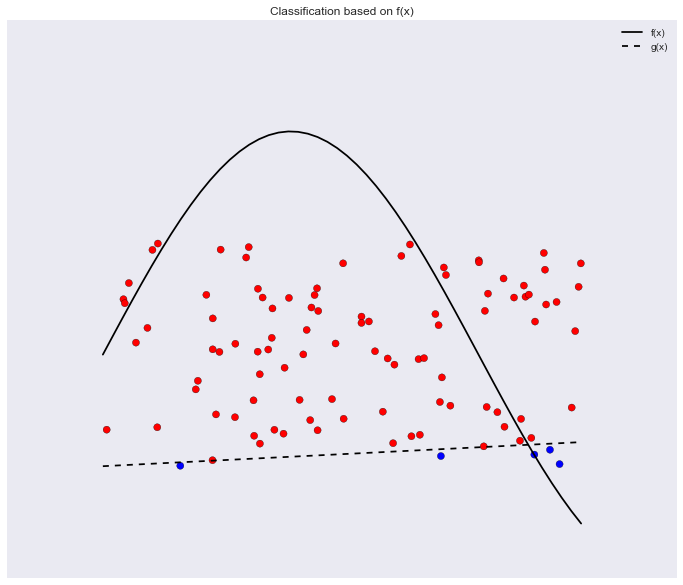

In [40]:
# Try PLA with this new data.
w = pla(xn,yn,maxIter=4000)

# Re-scale the weights to construct a new representation
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

figa = pl.gca()

gn = np.sign(g(xn[:,0])-xn[:,1])
color = lambda x: 'blue' if x == 1 else 'red'
colors = [color(item) for item in gn]

pl.scatter(xn[:,0],xn[:,1],c=colors,s=50);
pl.title('Classification based on f(x)')

pl.plot(x,f(x),'k',label='f(x)')
pl.plot(x,y(x),'k--',label = 'g(x)')
pl.legend()

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

In this case, our classifier cannot get all the cases right (red points should be above the black line, blue points below). This situation will probably become worse as we add more and more points. 

## PLA variants

**Task 3 (optional, no solution given):** Modify the existing ```pla()``` defined function to take a flag that specifies which version of PLA to use.  In addition to the ```simple``` version that is defined above, implement the ```avg``` ***averaged perceptron learning algorithm*** mode.

Maintain a weight vector $w_{avg}$ that is the average of all the weight vectors after each iteration. After training, return this weight vector instead of the final weight vector. This gives you the averaged perceptron.

**Task 4 (optional, no solution given):** After the introduction of the PLA, in the next lecture we went over the pocket algorithm.  

Implement the ```pocket``` version that always returns the best $g(x)$ seen so far that has the minimal $E_{in}$ value obtained, stored in its *pocket*. 

## Statement of Individual Work

Please initial (between the square brackets) one of the following statements.

[ ] I, <*substitute your matric number here*>, certify that I have followed the CS 3244 Machine Learning class guidelines for homework assignments.  In particular, I expressly vow that I have followed the Facebook rule in discussing with others in doing the assignment and did not take notes (digital or printed) from the discussions.  

[ ] I, <*substitute your matric number here*>, did not follow the class rules regarding the homework assignment, because of the following reason:

<*Please fill in*>

I suggest that I should be graded as follows:

<*Please fill in*>

### References

I have refered to the following list of people and websites in preparing my homework submission:

<*please fill in*>

## Tutorial Metadata

Title: Tutorial 1 - Playing around with the perceptron learning algorithm

Author: Kan Min-Yen <kanmy@comp.nus.edu.sg>

References: Original source from, with significant adaptation from Kostis Gourgoulias's <kgourg@twitter> original at http://notabstractnonsense.com/2014/12/18/an-ipython-notebook-on-the-linear-perceptron.html . As per its original license, this notebook is shared under CC-BY-4.0.

Due to the nature of this material as being used to teach students, we ask that you refrain from publishing any solutions in the open source domain, so as to help provoke thought from students (rather than mere searching skills).

<img src="cc-by-4_0.png">